<a href="https://colab.research.google.com/github/kasturiphatowali/kasturi/blob/main/set5%26set6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Set 5:House price prediction

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv('/content/drive/MyDrive/housing.csv')

In [3]:
# Load the dataset with proper validation checks
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952

In [4]:
x = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [5]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
# Identify categorical features
categorical_features = ['ocean_proximity']
numerical_features = [col for col in x_train.columns if col not in categorical_features]

# Create a column transformer to apply one-hot encoding to categorical features and impute missing values in numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Fit and transform the training data
x_train_processed = preprocessor.fit_transform(x_train)

# Transform the testing data
x_test_processed = preprocessor.transform(x_test)


model = LinearRegression()
model.fit(x_train_processed, y_train)

LinearRegression()

In [7]:
y_pred = model.predict(x_test_processed)
print("R-squared score:", r2_score(y_test, y_pred))
print("Mean squared error:", mean_squared_error(y_test, y_pred))

R-squared score: 0.6254382675296274
Mean squared error: 4908290571.346422


In [9]:
# Set 6: Data clustering

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [11]:
df = pd.read_csv('/content/drive/MyDrive/a1.txt', sep='\s+', header=None)

In [12]:
try:
    df.columns = ['X', 'Y']
    print('Dataset loaded successfully!')
except FileNotFoundError:
    print('File not found!')
except pd.errors.ParserError:
    print('could not parse the file')
except Exception as e:
    print('unexpected error', e)

Dataset loaded successfully!


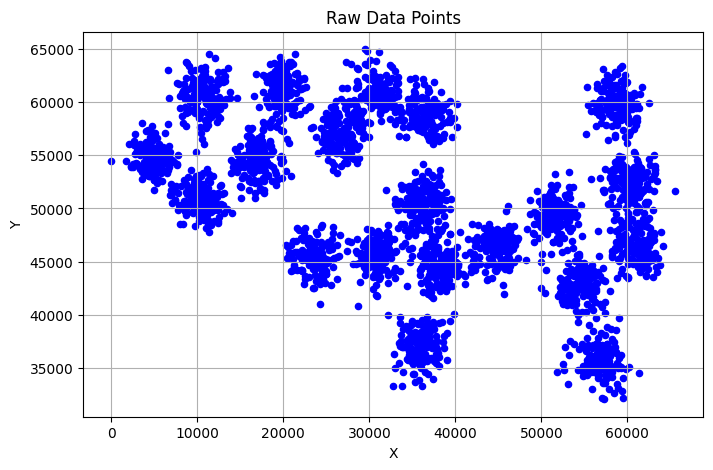

In [13]:
# Visualize raw data
plt.figure(figsize=(8, 5))
plt.scatter(df['X'], df['Y'], s=20, color='blue')
plt.title('Raw Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()



In [14]:
# Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)


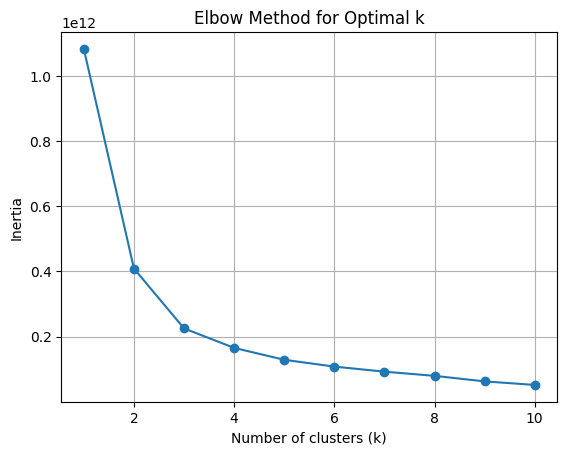

In [15]:
# Plot in graph
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

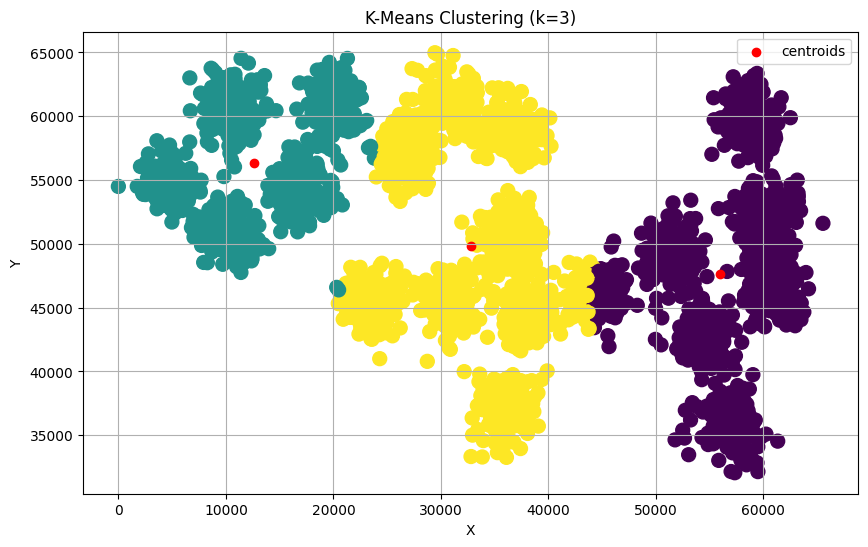

In [16]:
# applying kmeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
clusters = kmeans.fit_predict(df[['X', 'Y']]) # Fit on the original dataframe columns

# add cluster labels
df['Cluster'] = clusters

# visualization
plt.figure(figsize=(10, 6))
plt.scatter(x=df['X'], y=df['Y'], c=df['Cluster'], cmap='viridis', s=100) # Use plt.scatter and 'c' for coloring
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', label='centroids')
plt.title(f'K-Means Clustering (k={3})')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()